In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [20]:
jpeg_map = pd.read_csv("../measurements/jpeg/map.csv")
decom_map= pd.read_csv("../measurements/decomposition/map.csv")
reg_map = pd.read_csv("../measurements/regression/map.csv")
sketch_map = pd.read_csv("../measurements/sketchml/map.csv")

jpeg_time = pd.read_csv("../measurements/jpeg/time.csv")
decom_time = pd.read_csv("../measurements/decomposition/time.csv")
reg_time = pd.read_csv("../measurements/regression/time.csv")
sketch_time = pd.read_csv("../measurements/sketchml/time.csv")

jpeg_time = jpeg_time[jpeg_time["model_head_time"]<50]
decom_time = decom_time[decom_time["model_head_time"]<50]
reg_time = reg_time[reg_time["model_head_time"]<50]
sketch_time = sketch_time[sketch_time["model_head_time"]<50]

jpeg_time = jpeg_time[jpeg_time["model_head_time"]>0]
decom_time = decom_time[decom_time["model_head_time"]>0]
reg_time = reg_time[reg_time["model_head_time"]>0]
sketch_time = sketch_time[sketch_time["model_head_time"]>0]

In [21]:
jpeg_time.head()

,pruning_thresh,quality,frame_id,model_head_time,model_tail_time,framework_head_time,framework_tail_time,framework_response_time,compression_time,decompression_time,overall_time
1,0.05,60,2,10.009344,11.235808,1.059904,0.030496,23.070145,3.069856,0.055104,807.040894
2,0.05,60,3,9.899552,12.083936,1.048128,0.030848,22.620319,2.922528,0.056320,740.638184
3,0.05,60,4,9.894080,13.489920,1.171808,0.030624,25.140032,2.883776,0.055616,681.139160
4,0.05,60,5,9.864640,11.015936,0.871488,0.030016,21.844992,2.617760,0.088064,671.566833
5,0.05,60,6,9.925984,4.521376,1.048384,0.028736,14.110912,2.910240,0.054560,633.013000


## Real overal delay

In [22]:
# jpeg_time["Overall_real"] = jpeg_time["model_head_time"] +jpeg_time["framework_head_time"]+jpeg_time["compression_time"]+jpeg_time["framework_response_time"]
# decom_time["Overall_real"] = decom_time["model_head_time"] +decom_time["framework_head_time"]+decom_time["compression_time"]+decom_time["framework_response_time"]
# reg_time["Overall_real"] = reg_time["model_head_time"] +reg_time["framework_head_time"]+reg_time["compression_time"]+reg_time["framework_response_time"]
# sketch_time["Overall_real"] = sketch_time["model_head_time"] +sketch_time["framework_head_time"]+sketch_time["compression_time"]+sketch_time["framework_response_time"]


In [23]:
jpeg_time["Overall_real"] = jpeg_time["model_head_time"] +jpeg_time["model_tail_time"] +jpeg_time["framework_head_time"]+jpeg_time["framework_tail_time"]+jpeg_time["compression_time"]+jpeg_time["decompression_time"]
decom_time["Overall_real"] = decom_time["model_head_time"] +decom_time["model_tail_time"] +decom_time["framework_head_time"]+decom_time["framework_tail_time"]+decom_time["compression_time"]+decom_time["decompression_time"]
reg_time["Overall_real"] = reg_time["model_head_time"] +reg_time["model_tail_time"] +reg_time["framework_head_time"]+reg_time["framework_tail_time"]+reg_time["compression_time"]+reg_time["decompression_time"]
sketch_time["Overall_real"] = sketch_time["model_head_time"] +sketch_time["model_tail_time"] +sketch_time["framework_head_time"]+sketch_time["framework_tail_time"]+sketch_time["compression_time"]+sketch_time["decompression_time"]




In [24]:
pruning_general=0.25
pruning_regression = 0.25

Text(0.5, 0, 'Overall processing time [ms]')

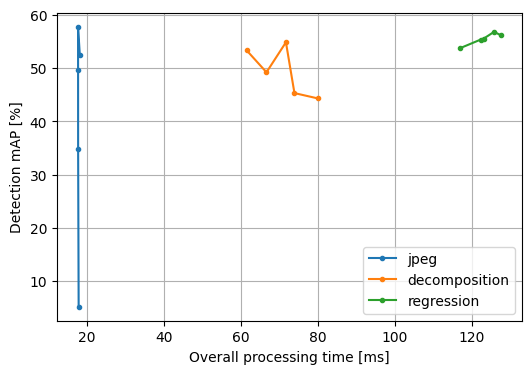

In [25]:
plt.figure(figsize=(6,4))
map_df_group = jpeg_map.groupby("pruning_thresh")
cha_df_group = jpeg_time.groupby("pruning_thresh")
keys = list(map_df_group.groups.keys())
map_df = map_df_group.get_group(pruning_general)
maps = map_df["map"].to_numpy()*100
cha_df = cha_df_group.get_group(pruning_general)
cha_df_g = cha_df.groupby("quality")
datasize = cha_df_g.mean()["Overall_real"].to_numpy()
plt.plot(datasize,maps, marker="." ,color=colors[0],label="jpeg")

map_df_group = decom_map.groupby("pruning_thresh")
cha_df_group = decom_time.groupby("pruning_thresh")
keys = list(map_df_group.groups.keys())
map_df = map_df_group.get_group(pruning_general)
maps = map_df["map"].to_numpy()*100
cha_df = cha_df_group.get_group(pruning_general)
cha_df_g = cha_df.groupby("quality")
datasize = cha_df_g.mean()["Overall_real"].to_numpy()/32
plt.plot(datasize,maps, marker="." ,color=colors[1],label="decomposition")

map_df_group = reg_map.groupby("pruning_thresh")
cha_df_group = reg_time.groupby("pruning_thresh")
keys = list(map_df_group.groups.keys())
map_df = map_df_group.get_group(pruning_regression)
maps = map_df["map"].to_numpy()*100
cha_df = cha_df_group.get_group(pruning_regression)
cha_df_g = cha_df.groupby("quality")
datasize = cha_df_g.mean()["Overall_real"].to_numpy()
plt.plot(datasize,maps, marker="." ,color=colors[2],label="regression")

# map_df_group = sketch_map.groupby("pruning_thresh")
# cha_df_group = sketch_time.groupby("pruning_thresh")
# keys = list(map_df_group.groups.keys())
# map_df = map_df_group.get_group(pruning_general)
# maps = map_df["map"].to_numpy()*100
# cha_df = cha_df_group.get_group(pruning_general)
# cha_df_g = cha_df.groupby("quality")
# datasize = cha_df_g.mean()["Overall_real"].to_numpy()
# plt.plot(datasize,maps, marker="." ,color=colors[3],label="sketchML")

plt.legend()
plt.grid()
# plt.ylim([43,57])
plt.ylabel("Detection mAP [%]")
plt.xlabel("Overall processing time [ms]")